In [1]:
pwd()
using Pkg; Pkg.activate("../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots

readdir()

  Activating project at `~/code/FermiCG`
┌ Info: Precompiling FermiCG [855c3b3a-d9bb-4919-8b00-0b3cfbdffb6f]
└ @ Base loading.jl:1423


25-element Vector{String}:
 ".ipynb_checkpoints"
 "README.md"
 "Untitled.ipynb"
 "cis_sa_density_mat.npy"
 "clustering.ipynb"
 "clustering_2.ipynb"
 "density_mat.npy"
 "geometry_1.xyz"
 "integrals_h0.npz"
 "integrals_h1.npz"
 "integrals_h2.npz"
 "integrals_single_precision.npz"
 "mo_coeffs_act.npy"
 "mo_coeffs_doc.npy"
 "nat_orb_active_space.out"
 "nat_orb_active_space.py"
 "orbitals.molden"
 "orbitals_doc.molden"
 "orbitals_loc.molden"
 "overlap_mat.npy"
 "rhf.out"
 "rhf.py"
 "rhf_mo_coeffs.npy"
 "scf.ipynb"
 "tet-4mer-rhf.py"

In [2]:
# build this just so we can print out molden files to view the MOs
molecule = "
H           -3.426100        -2.240400         5.488400
H           -5.627400        -1.077000         5.214700
C           -3.653500        -1.732700         4.551600
H           -1.767100        -2.237000         3.663900
C           -4.907300        -1.068800         4.394700
H           -6.163100         0.096400         3.101400
C           -2.725800        -1.732100         3.540600
H           -0.300300         1.083200        -5.235700
C           -5.209800        -0.419000         3.224900
C           -2.996100        -1.063600         2.307300
H           -1.103000        -1.532900         1.397700
H           -0.427000        -0.802900        -0.856600
H            0.236100        -0.097900        -3.127300
C           -1.019300         1.073000        -4.415000
H           -2.498800         2.251900        -5.503400
C           -4.274000        -0.392400         2.144500
H           -5.501500         0.794400         0.831000
C           -2.061300        -1.027200         1.271800
C           -1.382000        -0.289500        -0.977200
C           -0.717100         0.418000        -3.247600
C           -2.272000         1.739500        -4.569000
H           -4.157600         2.241200        -3.678700
C           -4.546300         0.281700         0.953400
C           -2.324300        -0.340200         0.070400
C           -1.652800         0.387400        -2.167000
C           -3.199800         1.734100        -3.558400
C           -3.604400         0.330900        -0.094300
C           -2.930200         1.059100        -2.329200
C           -3.866500         1.018700        -1.295500
H           -4.824300         1.525600        -1.421700
H            6.954300         5.020900        -5.781400
H            9.130800         5.788500        -4.794600
C            7.130300         4.913900        -4.709900
H            5.199700         4.047800        -4.322900
C            8.368100         5.351000        -4.148200
H            9.543000         5.570100        -2.368400
C            6.155900         4.370100        -3.908500
H            4.469100         3.270900        -2.103400
C            8.601900         5.233600        -2.800800
C            6.366300         4.207300        -2.503300
C            5.408400         3.620800        -1.673100
C            7.624000         4.655100        -1.933900
H            8.793800         4.849500        -0.136000
H            3.726000         2.535700         0.128600
C            5.630800         3.465600        -0.289200
C            7.849900         4.509800        -0.563800
C            4.668600         2.877900         0.557100
C            6.887300         3.923700         0.283000
H            8.046600         4.121200         2.098700
H            2.974600         1.818600         2.362500
C            4.893400         2.733400         1.927600
C            7.108600         3.769300         1.667200
C            3.915400         2.155900         2.795000
H            3.383500         1.608200         4.789600
C            6.150200         3.183400         2.497000
H            7.316000         3.346600         4.316500
C            4.148200         2.042400         4.143100
C            6.360000         3.023000         3.902600
C            5.385400         2.480900         4.704600
H            5.560600         2.377300         5.776700
H            1.028200         5.020900        -5.781400
H            3.204700         5.788500        -4.794600
C            1.204300         4.913900        -4.709900
H           -0.726400         4.047800        -4.322900
C            2.442000         5.351000        -4.148200
H            3.616900         5.570100        -2.368400
C            0.229800         4.370100        -3.908500
H           -1.457000         3.270900        -2.103400
C            2.675800         5.233600        -2.800800
C            0.440300         4.207300        -2.503300
C           -0.517600         3.620800        -1.673100
C            1.697900         4.655100        -1.933900
H            2.867800         4.849500        -0.136000
H           -2.200000         2.535700         0.128600
H           -2.951500         1.818600         2.362500
C           -0.295200         3.465600        -0.289200
C            1.923900         4.509800        -0.563800
H           -2.542500         1.608200         4.789600
C           -1.257500         2.877900         0.557100
C           -2.010600         2.155900         2.795000
C            0.961300         3.923700         0.283000
H            2.120600         4.121200         2.098700
C           -1.777900         2.042400         4.143100
H           -0.365500         2.377300         5.776700
C           -1.032700         2.733400         1.927600
C            1.182500         3.769300         1.667200
C           -0.540600         2.480900         4.704600
C            0.224100         3.183400         2.497000
C            0.434000         3.023000         3.902600
H            1.389900         3.346600         4.316500
H            3.427300         2.251900        -5.503400
H            5.625800         1.083200        -5.235700
C            3.654100         1.739500        -4.569000
H            1.768500         2.241200        -3.678700
H            0.298700        -1.077000         5.214700
C            4.906700         1.073000        -4.415000
H            6.162100        -0.097900        -3.127300
C            2.726300         1.734100        -3.558400
H           -0.237000         0.096400         3.101400
C            1.018700        -1.068800         4.394700
H            2.500000        -2.240400         5.488400
H            0.424600         0.794400         0.831000
H            1.101800         1.525600        -1.421700
C            5.209000         0.418000        -3.247600
C            2.995900         1.059100        -2.329200
C            0.716200        -0.419000         3.224900
C            2.272600        -1.732700         4.551600
H            4.159000        -2.237000         3.663900
C            1.379700         0.281700         0.953400
C            2.059600         1.018700        -1.295500
C            4.273300         0.387400        -2.167000
H            5.499100        -0.802900        -0.856600
C            1.652100        -0.392400         2.144500
C            3.200300        -1.732100         3.540600
C            2.321700         0.330900        -0.094300
C            4.544100        -0.289500        -0.977200
C            2.930000        -1.063600         2.307300
C            3.601700        -0.340200         0.070400
C            3.864800        -1.027200         1.271800
H            4.823000        -1.532900         1.397700
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "6-31g*"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);



We've already isolated our pi space into `Cact`, now we need to subdivide into a space to get cmf orbitals. 
- Each chromophore of 18 orbitals will have 6 active orbitals. 
  24 doubly occ and 24 vir
- Then we will localize and cluster both `doc` and `vir` orbital spaces separately to yield 4 clusters, each with 
  6 `doc`, 6 `act`, and 6 `vir`. 

In [3]:
using LinearAlgebra, Printf, PyCall

#load integrals from disk
ints = InCoreInts(
    npzread("integrals_h0.npz")["a"], 
    npzread("integrals_h1.npz")["a"], 
    npzread("integrals_h2.npz")["a"] 
);
Crhf = npzread("rhf_mo_coeffs.npy")
C = npzread("mo_coeffs_act.npy")
S = npzread("overlap_mat.npy");
D = npzread("density_mat.npy");
D_state_avg = npzread("cis_sa_density_mat.npy");

#
# 

thresh=.005

doc_list = []
act_list = []
vir_list = []

D_evals, D_evecs = eigen(C' * S * D_state_avg * S * C)
perm = reverse(sortperm(D_evals))
D_evals = D_evals[perm]
D_evecs = D_evecs[:, perm]
for (idx, n) in enumerate(D_evals)
    @printf(" %4i = %12.8f", idx, n)
    if n < 2.0 - thresh
        if n > thresh
            println(" Active")
            push!(act_list, idx)
        else
            push!(vir_list, idx)
            println(" Virt")
        end
    else
        println(" DOcc")
        push!(doc_list, idx)
    end
end


Cno = C * D_evecs

# # Localize active orbitals
# pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(12)
# pymol = pyscf.gto.Mole(atom=molecule,
#     symmetry = true,spin =0,charge=0,
#     basis = basis)
# pymol.build()
# pyscflo = pyimport("pyscf.lo")
# Cno[:, act_list] .= pyscflo.PM(pymol).kernel(C[:, act_list], verbose=4);

@time Cno[:, act_list] .= FermiCG.localize(Cno[:, act_list], "pm", mol)

U = C'*S*Cno

Cdoc = Cno[:, doc_list]
Cact = Cno[:, act_list]
Cvir = Cno[:, vir_list];

# Rotate ints into new orbitals
@time ints = FermiCG.orbital_rotation(ints, U);
C = Cno
FermiCG.pyscf_write_molden(mol, Cno, filename="orbitals_loc.molden");

    1 =   1.99951597 DOcc
    2 =   1.99951237 DOcc
    3 =   1.99949726 DOcc
    4 =   1.99948334 DOcc
    5 =   1.99943708 DOcc
    6 =   1.99942716 DOcc
    7 =   1.99941235 DOcc
    8 =   1.99939998 DOcc
    9 =   1.99885382 DOcc
   10 =   1.99881680 DOcc
   11 =   1.99879715 DOcc
   12 =   1.99877786 DOcc
   13 =   1.99768818 DOcc
   14 =   1.99751625 DOcc
   15 =   1.99742837 DOcc
   16 =   1.99742226 DOcc
   17 =   1.99711450 DOcc
   18 =   1.99699826 DOcc
   19 =   1.99694999 DOcc
   20 =   1.99691139 DOcc
   21 =   1.99682631 DOcc
   22 =   1.99658703 DOcc
   23 =   1.99651079 DOcc
   24 =   1.99642149 DOcc
   25 =   1.99224468 Active
   26 =   1.99164721 Active
   27 =   1.99113492 Active
   28 =   1.99089081 Active
   29 =   1.98987649 Active
   30 =   1.98902778 Active
   31 =   1.98893339 Active
   32 =   1.98826428 Active
   33 =   1.85075634 Active
   34 =   1.81597824 Active
   35 =   1.80329153 Active
   36 =   1.77129930 Active
   37 =   0.23487063 Active
   38 =   0.

/Users/nmayhall/code/FermiCG/src/python/venv/lib/python3.9/site-packages/pyscf/lib/misc.py:46: H5pyDeprecationWarning: Using default_file_mode other than 'r' is deprecated. Pass the mode to h5py.File() instead.
  h5py.get_config().default_file_mode = 'a'
/Users/nmayhall/code/FermiCG/src/python/venv/lib/python3.9/site-packages/pyscf/lib/misc.py:110: UserWarning: OpenMP is not available. Setting omp_threads to 1 has no effects.
  warnings.warn('OpenMP is not available. '
┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /Users/nmayhall/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


 Laplacian Eigenvalues
    1   0.00000000
    2   0.07983311
    3   0.17378900
    4   0.21764550
    5   0.55417078
    6   0.56352413
    7   0.57939698
    8   0.60577070
    9   1.35308575
   10   1.35881794
   11   1.38462446
   12   1.40443678
   13   1.70230684
   14   1.71214163
   15   1.75673881
   16   1.80026288
   17   2.13384169
   18   2.14864524
   19   2.17865500
   20   2.19653983
   21   2.93427382
   22   2.94391554
   23   2.97228848
   24   3.00244384
[1, 5, 9, 12, 13, 24, 2, 6, 11, 14, 18, 22, 4, 7, 10, 15, 19, 21, 3, 8, 16, 17, 20, 23]

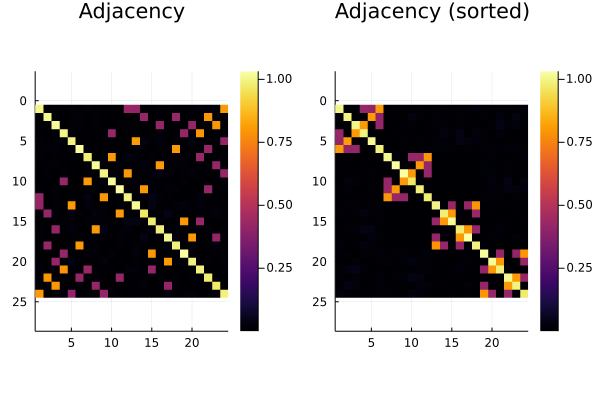

In [4]:
using Clustering
using SpectralClustering
using Random
Random.seed!(2)

function cluster_orbitals(A, n_clusters)
    """
    A is adjacency matrix
    """
    
    L = Diagonal([sum(A[i,:]) for i in 1:size(A,1)]) - A;
    F = eigen(L);
    perm = sortperm(F.values, by=abs)
    F.values .= F.values[perm]
    F.vectors .= F.vectors[:,perm]

    print(" Laplacian Eigenvalues\n")
    for (fi_idx, fi) in enumerate(F.values)
        @printf(" %4i %12.8f\n", fi_idx, fi)
    end
    
    p1 = plot(F.values)
    
    A = abs.(F.vectors[:,1:n_clusters]*F.vectors[:,1:n_clusters]')
    p2 = heatmap(abs.(A), aspect_ratio=:equal, title="Projector", yflip = true)
    
    clustering = clusterize(KMeansClusterizer(n_clusters), A).assignments;

    # println(clustering)
    perm = sortperm(clustering)
    p3 = heatmap(abs.(A[perm,perm]), aspect_ratio=:equal, title="Projector", yflip = true)

    clusters = [ [] for i in 1:n_clusters]
    for (idx,i) in enumerate(sort(clustering))
        push!(clusters[i],idx)
    end

    plot(p1, p2, p3, layout = @layout [a; b c])

    return perm, clusters
end



# Build Adjacency matrix (1rdm) in the active space
n_clusters = 4
adjacency = abs.(Cact' * S * D_state_avg * S * Cact)
perm, cluster_list = cluster_orbitals(adjacency, n_clusters)
print(perm)
    
p1 = heatmap(adjacency, aspect_ratio=:equal, title="Adjacency", yflip = true) 
p2 = heatmap(adjacency[perm, perm], aspect_ratio=:equal, title="Adjacency (sorted)", yflip = true) 



cluster_list = [[i for i in 1:24], [i.+24 for i in cluster_list]..., [i for i in 49:72]]

perm = [collect(1:24)..., (perm .+ 24)..., collect(49:72)...]

# reorder orbitals
C_sorted = C[:,perm]
ints_sorted = deepcopy(ints)
ints_sorted.h1 .= ints.h1[perm,perm]
ints_sorted.h2 .= ints.h2[perm,perm,perm,perm];

FermiCG.pyscf_write_molden(mol, C_sorted, filename="orbitals.molden");

plot(p1, p2, layout = @layout [a b])

In [5]:
# define clusters
clusters = [Cluster(i,collect(cluster_list[i])) for i = 1:length(cluster_list)]

init_fspace = Vector{Tuple{Int,Int}}()
push!(init_fspace, (24,24))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (0,0))

display(clusters)


6-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
 Cluster(2, [25, 26, 27, 28, 29, 30])
 Cluster(3, [31, 32, 33, 34, 35, 36])
 Cluster(4, [37, 38, 39, 40, 41, 42])
 Cluster(5, [43, 44, 45, 46, 47, 48])
 Cluster(6, [49, 50, 51, 52, 53, 54, 55, 56, 57, 58  …  63, 64, 65, 66, 67, 68, 69, 70, 71, 72])

# CMF

In [6]:
rdm1 =  C_sorted' * S * D * S * C_sorted * .5

e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_sorted, clusters, init_fspace, rdm1, rdm1,
                                        max_iter_oo=150, verbose=0, gconv=1e-6, method="bfgs");

C_cmf = C_sorted * U
ints_cmf = FermiCG.orbital_rotation(ints_sorted, U);


 ooCMF Iter:    1 Total= -2754.608997389064 Active= -282.022323975464 G=     9.16e-02
 ooCMF Iter:    2 Total= -2754.613253816297 Active= -282.026580402697 G=     4.89e-02
 ooCMF Iter:    3 Total= -2754.614980403231 Active= -282.028306989631 G=     6.64e-02
 ooCMF Iter:    4 Total= -2754.622571413961 Active= -282.035898000362 G=     1.47e-01
 ooCMF Iter:    5 Total= -2754.648406550557 Active= -282.061733136957 G=     2.05e-01
 ooCMF Iter:    6 Total= -2754.663962407398 Active= -282.077288993798 G=     1.82e-01
 ooCMF Iter:    7 Total= -2754.679873098092 Active= -282.093199684492 G=     1.16e-01
 ooCMF Iter:    8 Total= -2754.683190499518 Active= -282.096517085918 G=     9.24e-02
 ooCMF Iter:    9 Total= -2754.686938534598 Active= -282.100265120998 G=     1.14e-01
 ooCMF Iter:   10 Total= -2754.691148848594 Active= -282.104475434994 G=     1.26e-01
 ooCMF Iter:   11 Total= -2754.695804899758 Active= -282.109131486158 G=     1.32e-01
 ooCMF Iter:   12 Total= -2754.699317126162 Active= -2

 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -2.754705e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.26e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.17e-06 ≰ 0.0e+00
    |f(x) - f(x')|         = 5.55e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.01e-14 ≰ 0.0e+00
    |g(x)|                 = 5.33e-06 ≰ 1.0e-06

 * Work counters
    Seconds run:   1507  (vs limit Inf)
    Iterations:    150
    f(x) calls:    306
    ∇f(x) calls:   306


 ooCMF Iter:  151 Total= -2754.705465058627 Active= -282.118791645027 G=     3.54e-05
*ooCMF -2754.70546506 


In [7]:
e_cmf, U, Da, Db  = FermiCG.cmf_oo(ints_cmf, clusters, init_fspace, Da, Db,
                                        max_iter_oo=50, verbose=0, gconv=1e-6, method="bfgs");
C_cmf = C_cmf * U
ints_cmf = FermiCG.orbital_rotation(ints_cmf, U);


 ooCMF Iter:    1 Total= -2754.705465058627 Active= -282.118791645027 G=     3.54e-05
 ooCMF Iter:    2 Total= -2754.705465058933 Active= -282.118791645334 G=     1.12e-05
 ooCMF Iter:    3 Total= -2754.705465058967 Active= -282.118791645367 G=     6.94e-06
 ooCMF Iter:    4 Total= -2754.705465058993 Active= -282.118791645393 G=     8.08e-06
 ooCMF Iter:    5 Total= -2754.705465059053 Active= -282.118791645454 G=     1.34e-05
 ooCMF Iter:    6 Total= -2754.705465059184 Active= -282.118791645584 G=     1.63e-05
 ooCMF Iter:    7 Total= -2754.705465059293 Active= -282.118791645693 G=     1.14e-05
 ooCMF Iter:    8 Total= -2754.705465059332 Active= -282.118791645732 G=     6.10e-06


 * Status: success

 * Candidate solution
    Final objective value:     -2.754705e+03

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.69e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.60e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.23e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.46e-15 ≰ 0.0e+00
    |g(x)|                 = 8.22e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   70  (vs limit Inf)
    Iterations:    8
    f(x) calls:    20
    ∇f(x) calls:   20


 ooCMF Iter:    9 Total= -2754.705465059344 Active= -282.118791645744 G=     3.79e-06
*ooCMF -2754.70546506 


# Localize and Cluster doubly occupied and virtual spaces

In [8]:
# Localize doc and vir spaces
U_loc = Matrix(1.0I, size(U))
Cdoc .= FermiCG.localize(C_cmf[:, clusters[1].orb_list], "pm", mol)
Cvir .= FermiCG.localize(C_cmf[:, clusters[6].orb_list], "pm", mol);
U_loc[clusters[1].orb_list, clusters[1].orb_list] = C_cmf[:, clusters[1].orb_list]' * S * Cdoc
U_loc[clusters[6].orb_list, clusters[6].orb_list] = C_cmf[:, clusters[6].orb_list]' * S * Cvir
C_loc = C_cmf*U_loc
ints_loc = FermiCG.orbital_rotation(ints_cmf, U_loc);

Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 2.3112280711948  delta_f= 2.31123  |g|= 0.508126  4 KF 21 Hx
macro= 2  f(x)= 5.2420908334459  delta_f= 2.93086  |g|= 0.698861  4 KF 20 Hx
macro= 3  f(x)= 7.606296905756  delta_f= 2.36421  |g|= 0.579474  4 KF 21 Hx
macro= 4  f(x)= 7.9906979129719  delta_f= 0.384401  |g|= 0.369008  3 KF 21 Hx
macro= 5  f(x)= 8.1509435290102  delta_f= 0.160246  |g|= 0.0719151  3 KF 8 Hx
macro= 6  f(x)= 8.1539150451419  delta_f= 0.00297152  |g|= 0.00213139  2 KF 5 Hx
macro= 7  f(x)= 8.1539150671638  delta_f= 2.2022e-08  |g|= 0.000150298  1 KF 2 Hx
macro X = 7  f(x)= 8.1539150671638  |g|= 0.000150298  14 intor 21 KF 98 Hx
Set conv_tol_grad to 0.000316228
macro= 1  f(x)= 2.0336245687736  delta_f= 2.03362  |g|= 0.47434  4 KF 21 Hx
macro= 2  f(x)= 3.6557615846094  delta_f= 1.62214  |g|= 0.635482  4 KF 20 Hx
macro= 3  f(x)= 5.6623418025957  delta_f= 2.00658  |g|= 0.665041  4 KF 20 Hx
macro= 4  f(x)= 7.5442607989858  delta_f= 1.88192  |g|= 0.541947  4 KF 21 Hx
mac

In [27]:
FermiCG.pyscf_write_molden(mol, C_loc, filename="orbitals_cmf.molden");
Da_cmf = Da
Db_cmf = Db;
Da_loc = Da_cmf * U_loc
Db_loc = Db_cmf * U_loc;

In [28]:
doc_clustering = [4,1,3,1,1,2,3,4,1,2,3,4,1,2,4,1,4,2,3,4,3,2,3,2];
vir_clustering = [4,2,4,1,3,3,2,1,3,2,1,1,3,2,4,1,3,4,2,1,3,4,4,2];
doc_perm = sortperm(doc_clustering)
act_perm = collect(25:48)
vir_perm = sortperm(vir_clustering) .+ 48

perm = [doc_perm..., act_perm..., vir_perm...]

C_final = C_loc[:,perm]
ints_final = deepcopy(ints_loc)
ints_final.h1 .= ints_final.h1[perm,perm]
ints_final.h2 .= ints_final.h2[perm,perm,perm,perm]
FermiCG.pyscf_write_molden(mol, C_final, filename="orbitals.molden");

Da_final = Da_loc[perm,perm]
Db_final = Db_loc[perm,perm]

init_fspace = Vector{Tuple{Int,Int}}()
push!(init_fspace, (6,6))
push!(init_fspace, (6,6))
push!(init_fspace, (6,6))
push!(init_fspace, (6,6))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (3,3))
push!(init_fspace, (0,0))
push!(init_fspace, (0,0))
push!(init_fspace, (0,0))
push!(init_fspace, (0,0))

clusters = [Cluster(i, collect((i-1)*6+1:i*6)) for i = 1:12]

display(init_fspace)
display(clusters)

12-element Vector{Tuple{Int64, Int64}}:
 (6, 6)
 (6, 6)
 (6, 6)
 (6, 6)
 (3, 3)
 (3, 3)
 (3, 3)
 (3, 3)
 (0, 0)
 (0, 0)
 (0, 0)
 (0, 0)

12-element Vector{Cluster}:
 Cluster(1, [1, 2, 3, 4, 5, 6])
 Cluster(2, [7, 8, 9, 10, 11, 12])
 Cluster(3, [13, 14, 15, 16, 17, 18])
 Cluster(4, [19, 20, 21, 22, 23, 24])
 Cluster(5, [25, 26, 27, 28, 29, 30])
 Cluster(6, [31, 32, 33, 34, 35, 36])
 Cluster(7, [37, 38, 39, 40, 41, 42])
 Cluster(8, [43, 44, 45, 46, 47, 48])
 Cluster(9, [49, 50, 51, 52, 53, 54])
 Cluster(10, [55, 56, 57, 58, 59, 60])
 Cluster(11, [61, 62, 63, 64, 65, 66])
 Cluster(12, [67, 68, 69, 70, 71, 72])

In [30]:
ints = ints_final
Da = Da_final
Db = Db_final
C = C_final
@save "cmf_data.jld2" clusters init_fspace ints Da Db C S D D_state_avg mol

In [32]:
# For some reason, the density matrices coming from cmf_oo aren't correct. Do a quick CMF CI for the DMs
e, Da, Db, _  = FermiCG.cmf_ci(ints, clusters, init_fspace, Da, Db,
                                        max_iter=150, verbose=1);


 Slater Det Energy: -21.04408161
 Slater Det Energy: -17.50888637
 Slater Det Energy: -16.51804354
 Slater Det Energy: -19.84002728
 FCI:        -2506.63950287 -34.05282946 
 FCI:        -2503.70455830 -31.11788489 
 FCI:        -2505.88616184 -33.29948843 
 FCI:        -2507.83943047 -35.25275706 
 Slater Det Energy:  -2.02299365
 Slater Det Energy:  -2.46121266
 Slater Det Energy:  -2.21918570
 Slater Det Energy:  -2.06732947
 FCI:        -2477.39024776  -4.80357435 
 FCI:        -2478.13479952  -5.54812611 
 FCI:        -2477.73875483  -5.15208142 
 FCI:        -2477.54913802  -4.96246460 
 Slater Det Energy:  -2.49095020
 Slater Det Energy:  -2.46170826
 Slater Det Energy:  -2.54607391
 Slater Det Energy:  -2.49090996
 FCI:        -2478.11274254  -5.52606912 
 FCI:        -2478.07057829  -5.48390488 
 FCI:        -2478.15566982  -5.56899640 
 FCI:        -2478.10483191  -5.51815849 
 Slater Det Energy:  -2.47861590
 Slater Det Energy:  -2.45415968
 Slater Det Energy:  -2.54437382
 

In [34]:
@save "cmf_data.jld2" clusters init_fspace ints Da Db C S D D_state_avg mol